Co, Paolo Kenneth D.
2015-08128
CoE 197M

---



In [453]:
import numpy as np
import matplotlib.pyplot as plt

def get_angles(pos, i, d_model):
  angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
  return pos * angle_rates


(16, 16)


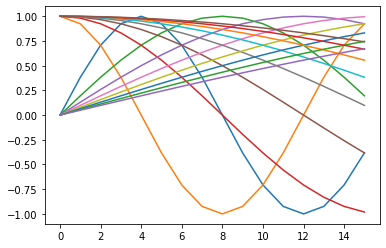

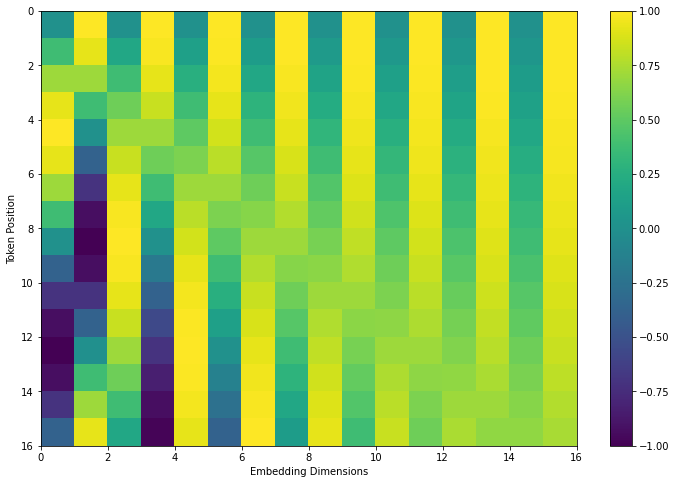

In [454]:
x = np.arange(0,2*np.pi,np.pi/8)[:,np.newaxis]
y = np.repeat(np.arange(1,9,1),2)[np.newaxis,:]
# print(x)
# print(y)
angles = x/y
# plt.plot(angles)

angles2 = angles
#apply sin to even
angles2[:, 0::2] = np.sin(angles2[:, 0::2])
#apply cos to odd
angles2[:, 1::2] = np.cos(angles2[:, 1::2])
    
pos_encoding = angles[np.newaxis, ...]
plt.plot(angles2)
pos_encoding = pos_encoding[0,:,:]

print (pos_encoding.shape)
plt.figure(figsize=(12,8))
plt.pcolormesh(pos_encoding, cmap='viridis')
plt.xlabel('Embedding Dimensions')
plt.xlim((0, 16))
plt.ylim((16,0))
plt.ylabel('Token Position')
plt.colorbar()
plt.show()

In [434]:
#orthogonal?
print(np.dot(pos_encoding[:,0],pos_encoding[:,3]))
#not orthogonal

6.724864298273591


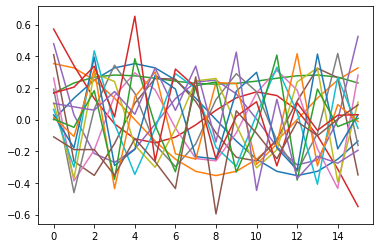

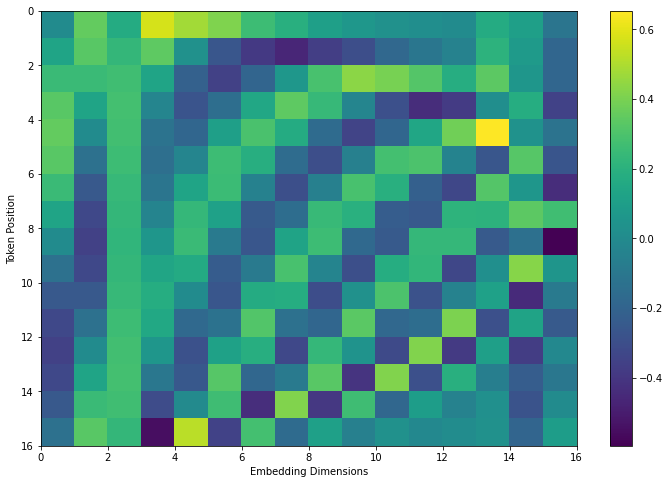

In [455]:
gs = pos_encoding[:,:]

len = 16

for v in range(len):
    temp = gs[:,v]
    temp = temp*np.linalg.norm(temp)
    for u in range(v):
        #subtract projections
        uv = np.dot(temp,gs[:,u])
        temp = temp - (uv)*gs[:,u]
    gs[:,v] = temp/np.linalg.norm(temp, ord=2)

plt.plot(gs)
plt.figure(figsize=(12,8))
plt.pcolormesh(gs, cmap='viridis')
plt.xlabel('Embedding Dimensions')
plt.xlim((0, 16))
plt.ylim((16,0))
plt.ylabel('Token Position')
plt.colorbar()
plt.show()   


In [465]:
np.dot(gs[:,14],gs[:,11])

9.756084828893563e-15